In [257]:
import pickle
#from detectron2.structures import Instances, Boxes
import matplotlib.pyplot as plt

with open('/Users/trevorchan/Downloads/rep_low_small_instances.data','rb') as filehandle:
    instance_dict = pickle.load(filehandle)

misc_dict = {
            #"pred_boxes":Boxes(instance_dict['pred_boxes']),
            "pred_masks":instance_dict['pred_masks'],
            #"scores":instance_dict['scores'],
            #"pred_classes":instance_dict['classes'],
            }

In [258]:
polys = instance_dict['pred_masks']

In [259]:
result = np.zeros((400,400), dtype=int)

for i in range(len(polys)):
    polygon = np.copy(polys[i])

    #img = Image.new('I', (400,400), 0)
    #img1 = ImageDraw.Draw(img)
    #img1.polygon(polygon[0].tolist(), fill = i, outline = i)
    
    img = Image.new('1', (400,400), 0)
    img1 = ImageDraw.Draw(img)
    img1.polygon(polygon[0].tolist(), fill = 1, outline = 1)
    
    result = np.add(result,img)
#m = max([max(i) for i in result])
#result = (result*255/m).astype(np.uint8)
result = result.astype(bool)

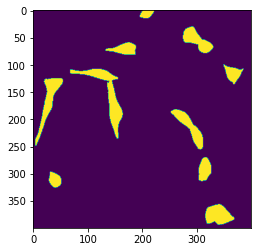

In [260]:
plt.imshow(result)
im = Image.fromarray(result)
im.save("rep_low_small_mask_result.png")

In [72]:
#im = Image.fromarray(result)
#im.save("rep_high_small_model_result.jpeg")
print(len(polys))

14


In [77]:
print(len(polys))

60


In [82]:
print(len(polys))

155


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
384

In [299]:
im1 = np.asarray(Image.open('/Users/trevorchan/Desktop/figures/F1_Brightfield_Seg/groundtruths/low.tif')).astype(bool)
im2 = np.asarray(Image.open('binarymask_rep_low_small_8.png')).astype(bool)


In [300]:
smol = im1&im2
sum(sum(smol))

7640

In [301]:
err = im1^im2
sum(sum(err))

4016

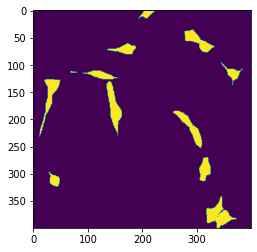

In [302]:
plt.imshow(im1)

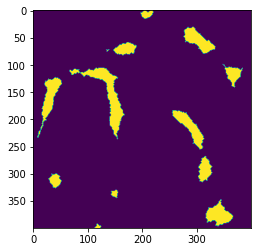

In [303]:
plt.imshow(im2)

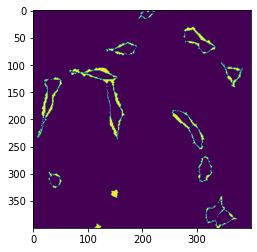

In [304]:
plt.imshow(err)

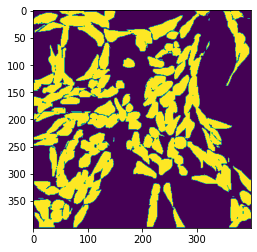

In [287]:
plt.imshow(smol)

In [306]:
3732/7831


0.4765674881879709

In [307]:
10832/29580

0.36619337390128465

In [308]:
25498/63193

0.4034940578861583

In [309]:
4016/7640

0.5256544502617801

In [310]:
15327/30783

0.4979046876522756

In [311]:
37844/72271

0.5236401876271257

In [330]:
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["lines.markersize"] = 4

In [355]:
x = ['low','mid','high']
gtmodelerrs = [0.4765674881879709,0.36619337390128465,0.4034940578861583]
gtfogbankerrs = [0.5256544502617801,0.4979046876522756,0.5236401876271257]

gtcellcount = [14,63,181]
modelcellcount = [14,60,155]
fogbankcellcount = [18,66,144]

modeldiff = [abs(i) for i in np.subtract(gtcellcount,modelcellcount)]
fbdiff = [abs(i) for i in np.subtract(gtcellcount,fogbankcellcount)]

gtmodelcounterr = np.divide(modeldiff,gtcellcount)
gtfbcounterr = np.divide(fbdiff,gtcellcount)


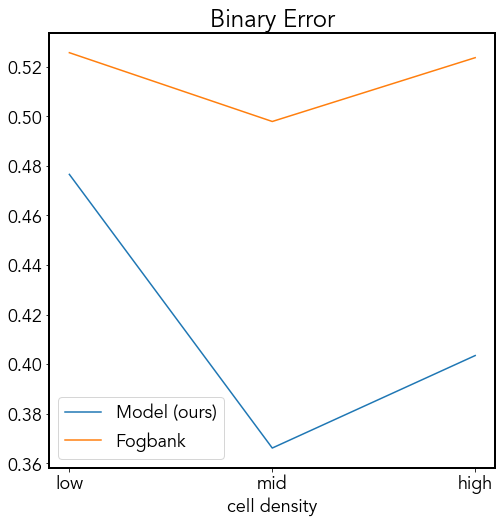

In [358]:
fig= plt.figure(figsize=(8,8))

plt.plot(x,gtmodelerrs)
plt.plot(x,gtfogbankerrs)
plt.legend(['Model (ours)','Fogbank'])
plt.title('Binary Error')
plt.xlabel('cell density')
plt.savefig('figure_outputs/binaryError.svg',format = 'svg')

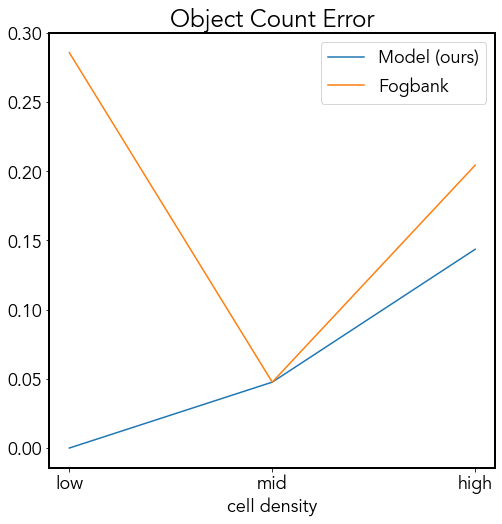

In [359]:
fig= plt.figure(figsize=(8,8))

plt.plot(x,gtmodelcounterr)
plt.plot(x,gtfbcounterr)

plt.legend(['Model (ours)','Fogbank'])
plt.title('Object Count Error')
plt.xlabel('cell density')
plt.savefig('figure_outputs/countError.svg',format = 'svg')

In [370]:
import networkx as nx

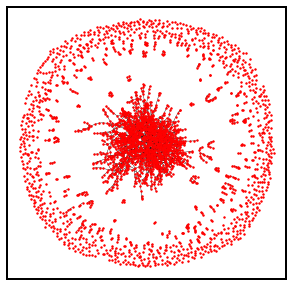

In [398]:
n = 3200

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

g = nx.gnm_random_graph(n, n*.7, seed=None, directed=False)
nx.draw_networkx(g, node_size = 2, node_color = 'r' , width = .4, with_labels=False
                ,ax=ax1)
plt.savefig('figure_outputs/highgraphex.svg',format='svg')